In [1]:
from tensorflow.keras.datasets import mnist

One of the best way to improve the model to fit is by increasing the capacity of the model. That is, by making the capacity to be able to overfit the data, which in turn tells us that the capacity of the model to fit the data has been achieved.

In [2]:
import tensorflow as tf
import keras

In [3]:
(train_images, train_labels), _ = tf.keras.datasets.mnist.load_data()

In [4]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [5]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

In [6]:
model = keras.Sequential([keras.layers.Dense(10, activation="softmax")])

model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_small_model = model.fit(train_images, train_labels,
                                epochs=20,
                                batch_size=128,
                                validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7390 - loss: 1.0510 - val_accuracy: 0.9045 - val_loss: 0.3615
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8988 - loss: 0.3673 - val_accuracy: 0.9128 - val_loss: 0.3110
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9090 - loss: 0.3256 - val_accuracy: 0.9191 - val_loss: 0.2931
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9139 - loss: 0.3032 - val_accuracy: 0.9194 - val_loss: 0.2853
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9199 - loss: 0.2861 - val_accuracy: 0.9206 - val_loss: 0.2814
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9194 - loss: 0.2859 - val_accuracy: 0.9226 - val_loss: 0.2764
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9204 - loss: 0.2851 - val_accuracy: 0.9242 - val_loss: 0.2745
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9254 - loss: 0.2711 - val_accuracy: 0.

The model above only have one layer, reason why it's named history_small_model.
Now lets look at how it fits on the loss curve:

In [7]:
import matplotlib.pyplot as plt

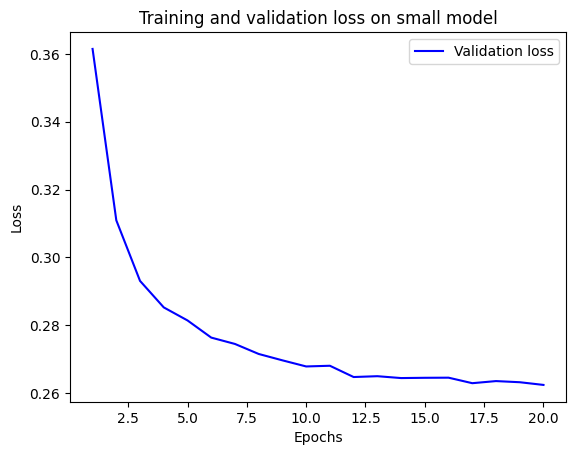

In [8]:
val_loss = history_small_model.history['val_loss']
epochs = range(1, 21)
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss on small model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The validation metrics seems to stall, or improve rather slowly. There is no sign of overfitting, meaning the model is still improving and fitting the data. so this model can't overfit.
Since for a model to be okay it should always be able to overfit the data, we will make the model bigger.i.e., we will increase the capacity of the model.

In [9]:
model = keras.Sequential([keras.layers.Dense(96, activation="relu"),
                         keras.layers.Dense(96, activation="relu"),
                         keras.layers.Dense(10, activation="softmax")])

model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_small_model = model.fit(train_images, train_labels,
                                epochs=20,
                                batch_size=128,
                                validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8235 - loss: 0.6297 - val_accuracy: 0.9417 - val_loss: 0.1981
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9454 - loss: 0.1806 - val_accuracy: 0.9580 - val_loss: 0.1397
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9648 - loss: 0.1198 - val_accuracy: 0.9668 - val_loss: 0.1154
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9727 - loss: 0.0908 - val_accuracy: 0.9649 - val_loss: 0.1219
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9778 - loss: 0.0743 - val_accuracy: 0.9718 - val_loss: 0.0982
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9809 - loss: 0.0612 - val_accuracy: 0.9730 - val_loss: 0.0953
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9855 - loss: 0.0471 - val_accuracy: 0.9735 - val_loss: 0.0942
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9878 - loss: 0.0409 - val_accuracy: 0.

Now, the model has more layers(two intermediate layers) and more Units. its capacity of map the data has been increased.

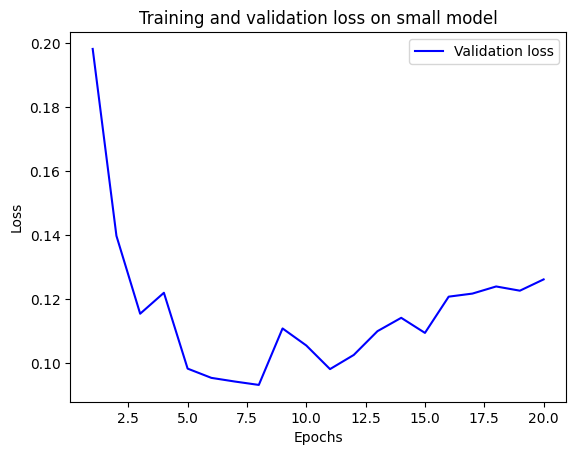

In [10]:
val_loss = history_small_model.history['val_loss']
epochs = range(1, 21)
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss on small model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

And now our model has start to overfit. we can now look at the model and tune it to make it generalize well.

So in essence, only when the model is capable of overfitting can it be tuned to generalized well, and this can be achieved by increasing the capacity of the model when the validation metrics stalls or improves too slowly.